# Load Packages, Libraries and Configs

* load packages

In [1]:
from RES.hdf5_handler import DataHandler
import RES.visuals as vis
import RES.utility as utils
import geopandas as gpd
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
font_family='sans-serif'

* Load Config

In [3]:
from colorama import Fore, Style

cfg=utils.load_config('config/config_CAN.yaml')
utils.print_banner(f"Supported Regions for {cfg.get('country')}")
print(Fore.YELLOW + ">> RegionCode: name <<" + Style.RESET_ALL + "\n")
for keys in cfg.get('region_mapping'):
    print(f"{keys}: {cfg.get('region_mapping').get(keys).get('name')}")


****************************
Supported Regions for Canada
****************************
>> RegionCode: name <<

AB: Alberta
BC: British Columbia
MB: Manitoba
NB: New Brunswick
NL: Newfoundland and Labrador
NS: Nova Scotia
ON: Ontario
PE: Prince Edward Island
QC: Québec
SK: Saskatchewan


# Set Region

In [4]:
# The tool is designed to work for WB6 regions
region_code='BC'
region_name=cfg.get('region_mapping').get(region_code).get('name') # type: ignore
utils.print_banner(f"Selected Region: {region_name} ({region_code})")

**************************************
Selected Region: British Columbia (BC)
**************************************


### Load store (hdf5 file)

In [5]:

store=f"./data/store/resources_{region_code}.h5" 
utils.print_banner(f"Store loaded for {region_name} ({region_code})")
res_data=DataHandler(store) # the DataHandler object could be initiated without the store definition as well.
res_data.show_tree(store)


**************************************
Store loaded for British Columbia (BC)
**************************************
____________________________________________________________
     RES.hdf5_handler|🗄️ Structure of HDF5 file: ./data/store/resources_BC.h5
____________________________________________________________
[key] boundary
[key] cells
[key] clusters
  └─ [key] clusters/solar
  └─ [key] clusters/wind
[key] cost
  └─ [key] cost/atb
  └─   └─ [key] cost/atb/bess
  └─   └─ [key] cost/atb/solar
  └─   └─ [key] cost/atb/wind
[key] dissolved_indices
  └─ [key] dissolved_indices/solar
  └─ [key] dissolved_indices/wind
[key] lines
[key] substations
[key] timeseries
  └─ [key] timeseries/clusters
  └─   └─ [key] timeseries/clusters/solar
  └─   └─ [key] timeseries/clusters/wind
  └─ [key] timeseries/solar
  └─ [key] timeseries/wind
[key] units


└> To access the data : 
 └> <datahandler instance>.from_store('<key>')


### Load dataframes from Store

In [6]:
# Loading dataframes
cells=res_data.from_store('cells')
boundary=res_data.from_store('boundary')
lines=res_data.from_store('lines')
ss=res_data.from_store('substations')
timeseries_clusters_solar=res_data.from_store('timeseries/clusters/solar')
timeseries_clusters_wind=res_data.from_store('timeseries/clusters/wind')
clusters_solar=res_data.from_store('clusters/solar')
clusters_wind=res_data.from_store('clusters/wind')

# Create Visuals

## Grid

In [7]:
# for columns in lines.columns:
#     print(f"{columns}")

### lines

 └> Transmission Lines for British Columbia saved to vis/BC/transmission_lines_BC.png


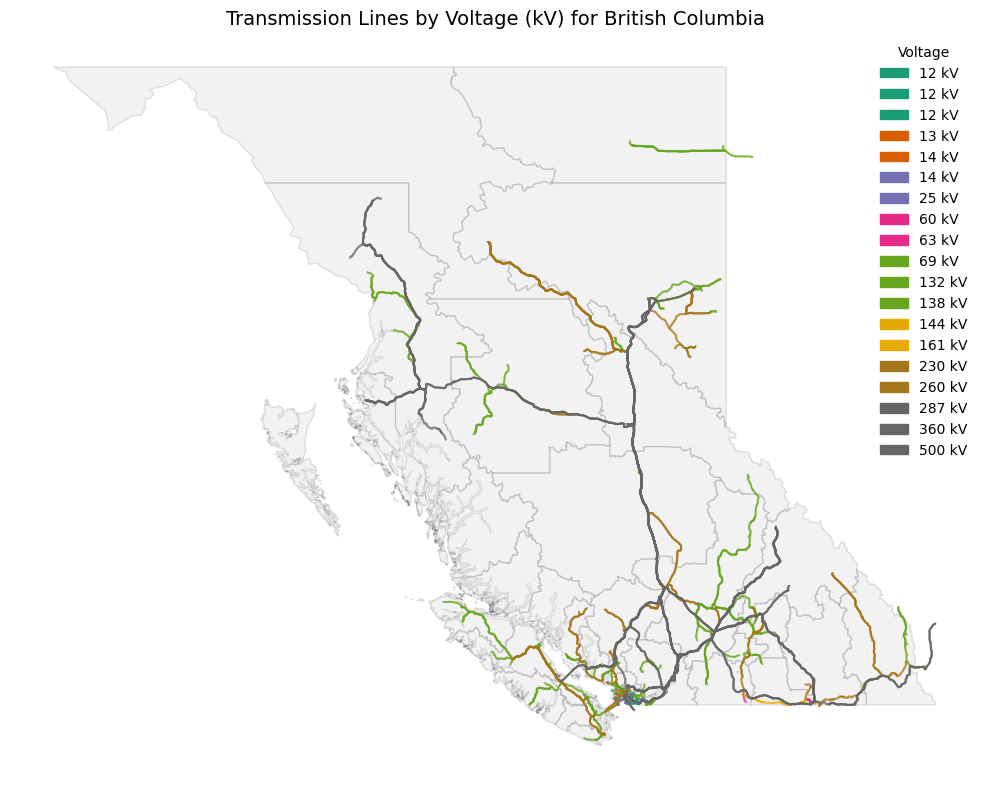

In [8]:
vis.plot_grid_lines(
    region_code=region_code,
    region_name=region_name,
    lines=lines,
    boundary=boundary,
    save_to=f"vis/{region_code}",
    font_family=font_family,
    show=True
)

### Substations

In [9]:
# <code>

## Resources

### Capacity Factor Map

* Individual Maps

 └> Please cross check with Solar CF map with GLobal Solar Atlas Data from : https://globalsolaratlas.info/download/country_name


<Axes: title={'center': 'Solar Resources for British Columbia'}>

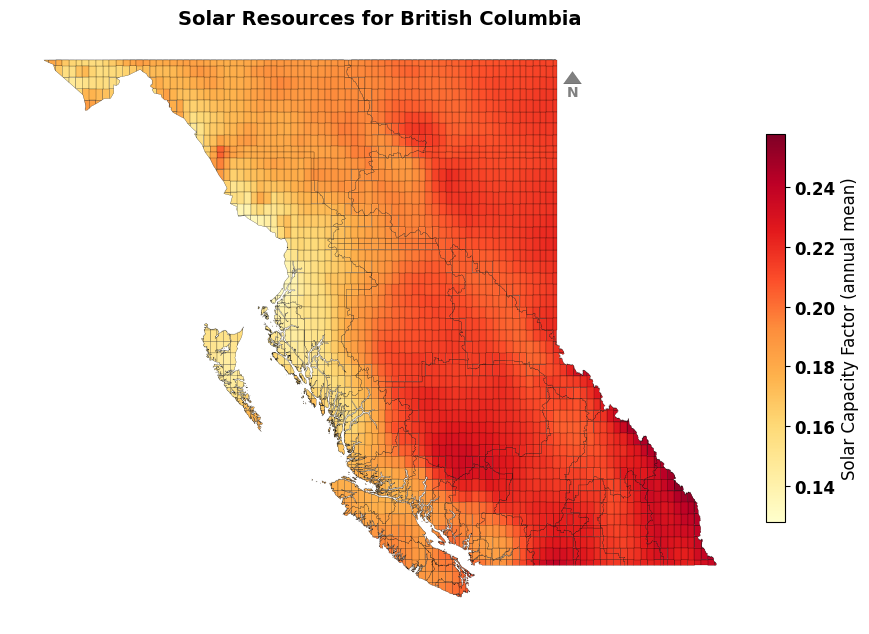

In [10]:
vis.get_data_in_map_plot(cells=cells, 
                resource_type='solar', 
                datafield='CF',
                title=f"Solar Resources for {region_name}",
                # ax=ax1,
                font_family=font_family,
                show=False)

In [11]:
# vis.get_data_in_map_plot(cells, 
#                 resource_type='wind', 
#                   datafield='CF',
#                 title=f"Wind Resources for {region_name}",
#                 # ax=ax1, 
#                 show=False)

* Combined Map

 └> Please cross check with Solar CF map with GLobal Solar Atlas Data from : https://globalsolaratlas.info/download/country_name


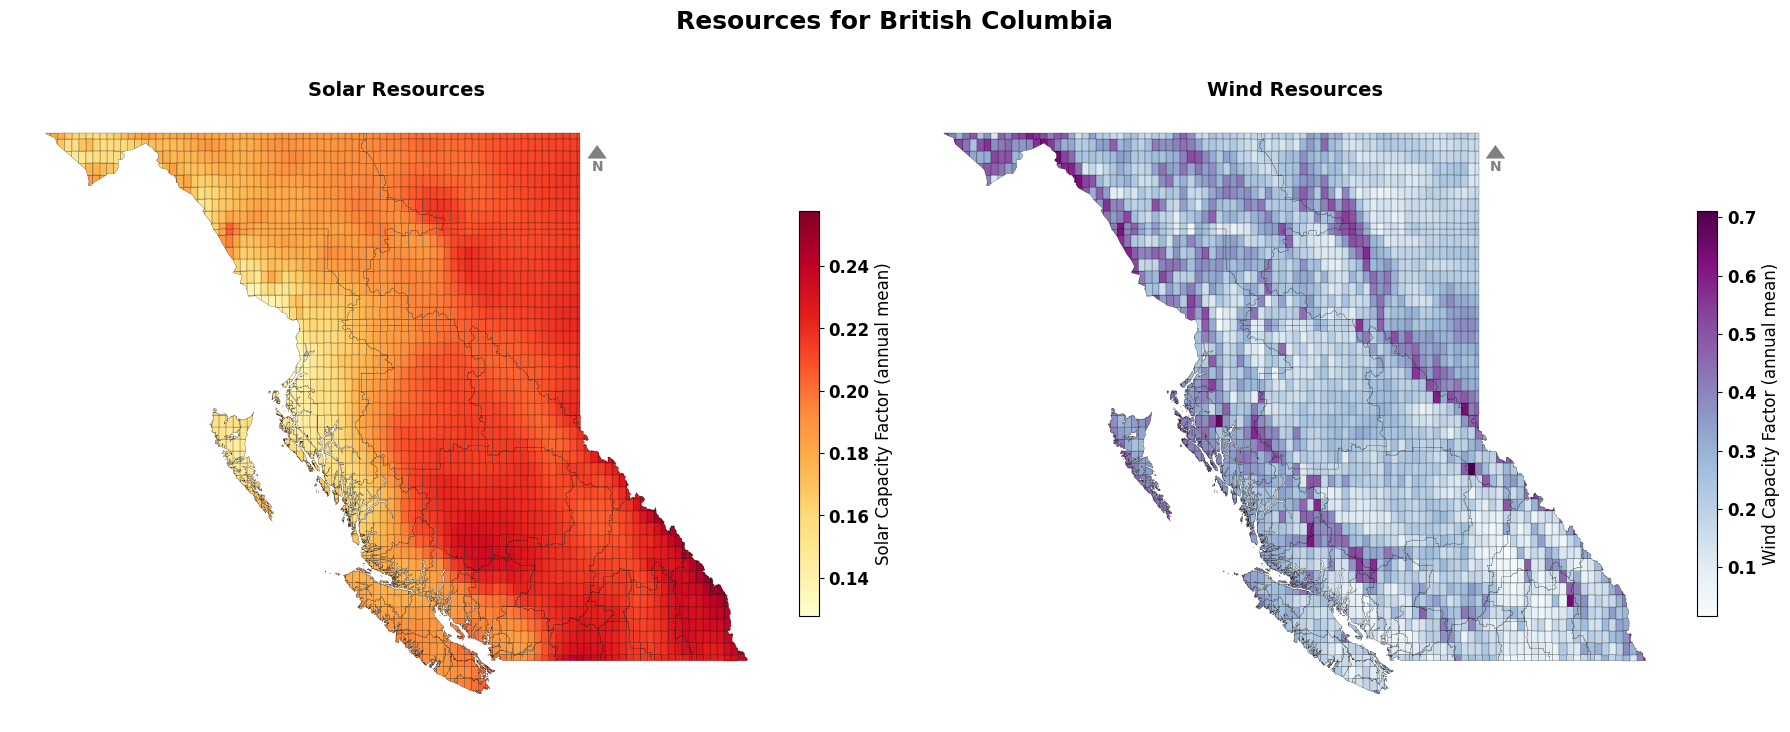

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

fig.suptitle(f"Resources for {region_name}", fontsize=18, fontweight='bold')

vis.get_data_in_map_plot(cells, 
                resource_type='solar',
                datafield='CF',
                ax=ax1, 
                show=False)
vis.get_data_in_map_plot(cells, 
                resource_type='wind',
                datafield='CF',
                ax=ax2, 
                show=False)

plt.tight_layout()
plt.savefig(f"vis/{region_code}/Resources_combined_CF.png", dpi=300, bbox_inches='tight', transparent=False)

### Capacity

In [13]:
# vis.get_data_in_map_plot(cells, 
#                 resource_type='solar',
#                 datafield='capacity',
#                 # ax=ax1, 
#                 show=False)

 └> Please cross check with Solar CF map with GLobal Solar Atlas Data from : https://globalsolaratlas.info/download/country_name


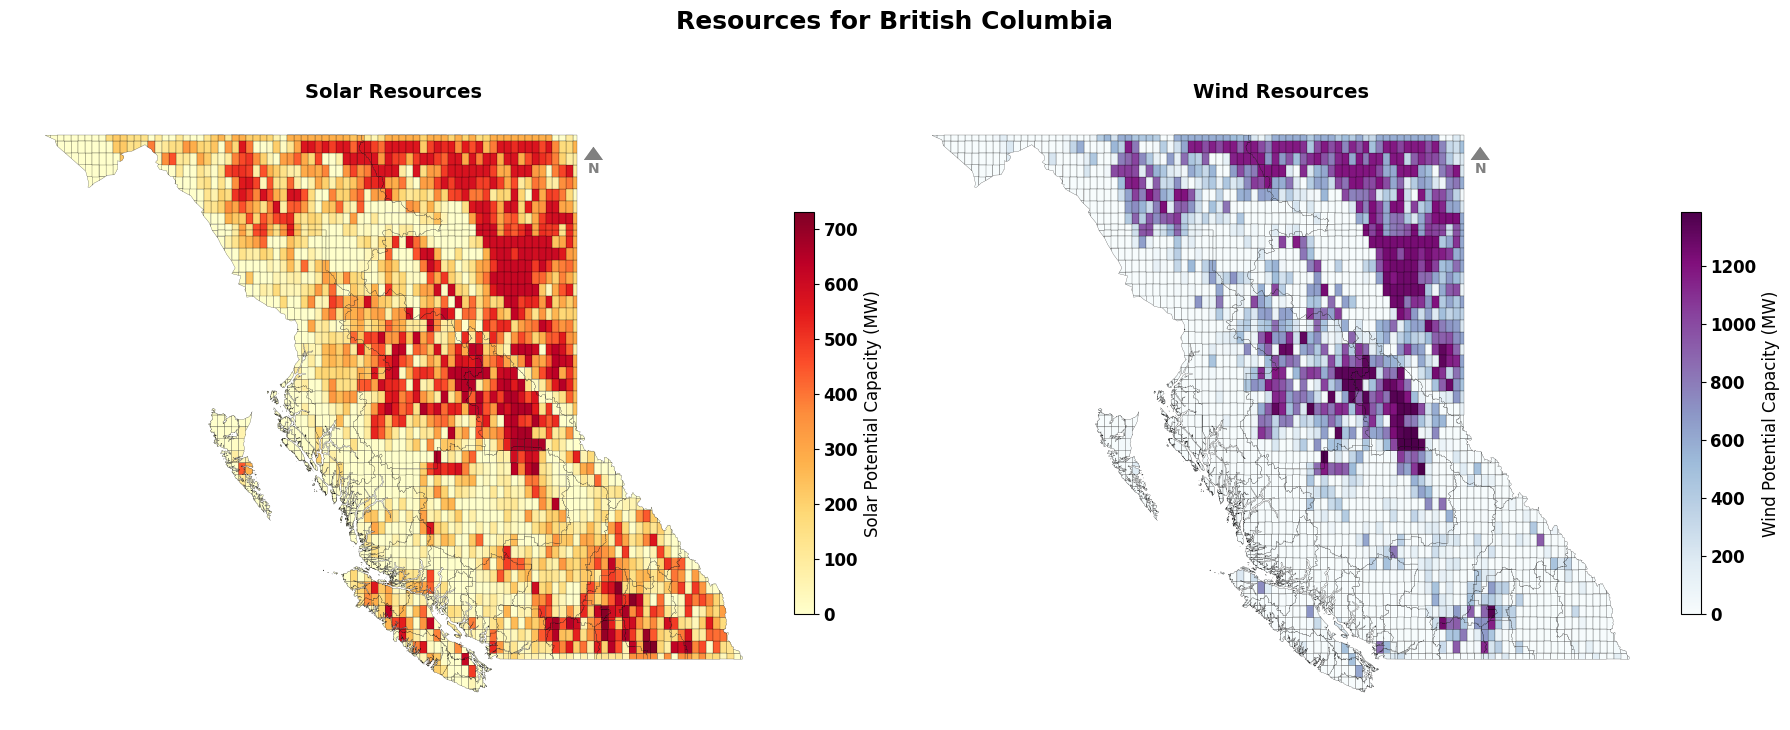

In [14]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

fig.suptitle(f"Resources for {region_name}", fontsize=18, fontweight='bold')

vis.get_data_in_map_plot(cells, 
                resource_type='solar',
                datafield='capacity',
                ax=ax1, 
                show=False)
vis.get_data_in_map_plot(cells, 
                resource_type='wind',
                datafield='capacity',
                ax=ax2, 
                show=False)

plt.tight_layout()

plt.savefig(f"vis/{region_code}/Resources_combined_CAPACITY.png", dpi=300, bbox_inches='tight', transparent=False)

### Score

In [15]:
# vis.get_data_in_map_plot(cells, 
#                 resource_type='solar',
#                 datafield='score',
#                 # ax=ax1, 
#                 show=False)

 └> Please cross check with Solar CF map with GLobal Solar Atlas Data from : https://globalsolaratlas.info/download/country_name


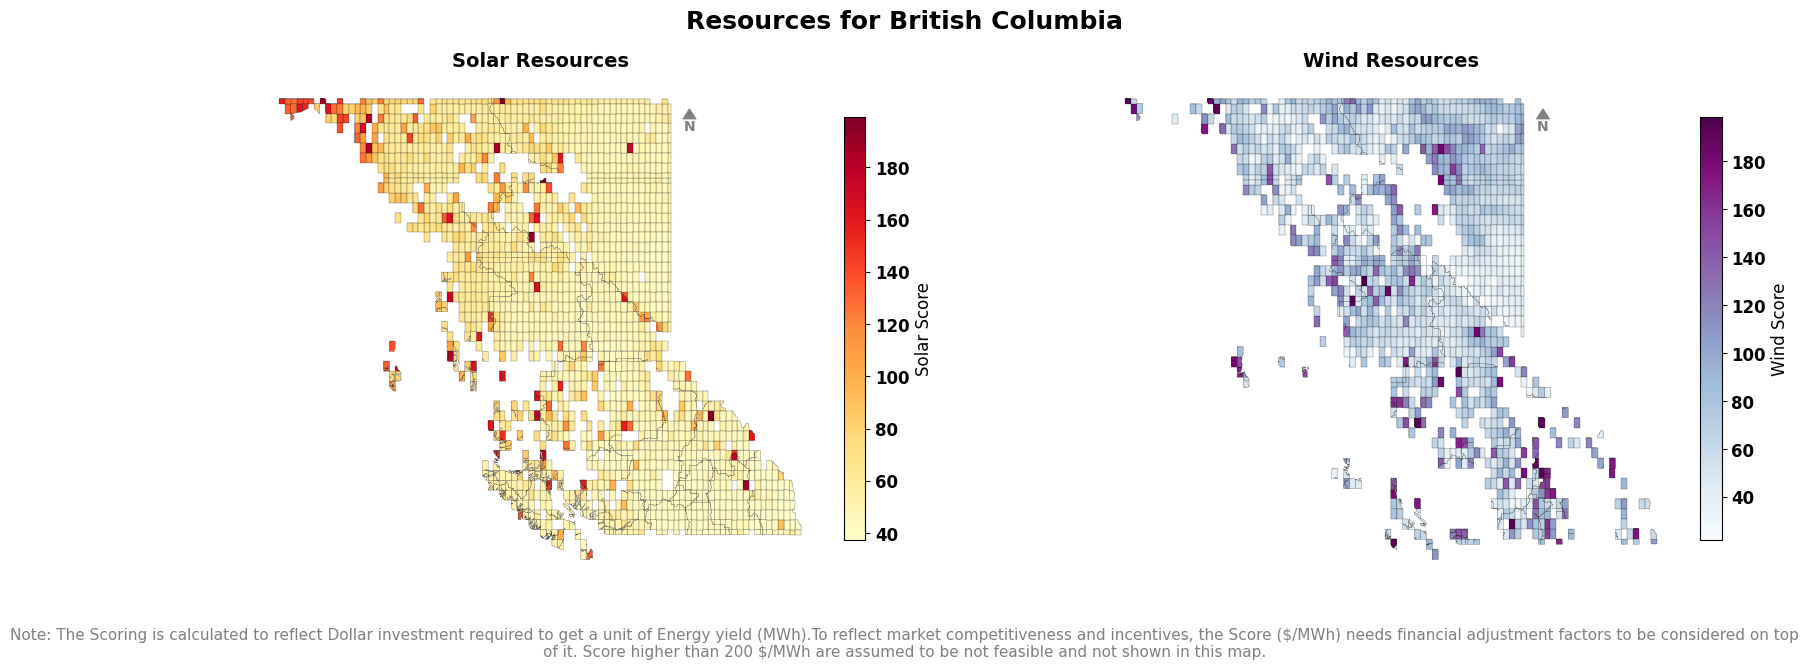

In [16]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

fig.suptitle(f"Resources for {region_name}", fontsize=18, fontweight='bold')

vis.get_data_in_map_plot(cells, 
                resource_type='solar',
                datafield='score',
                ax=ax1, 
                show=False)
vis.get_data_in_map_plot(cells, 
                resource_type='wind',
                datafield='score',
                ax=ax2, 
                show=False)
fig.text(
    0.5, -0.05,
    "Note: The Scoring is calculated to reflect Dollar investment required to get a unit of Energy yield (MWh).To reflect market competitiveness and incentives, the Score ($/MWh) needs financial adjustment factors to be considered on top of it. Score higher than 200 $/MWh are assumed to be not feasible and not shown in this map.",
    ha='center', va='top', fontsize=11, color='gray',wrap=True,
)
plt.tight_layout()

plt.savefig(f"vis/{region_code}/Resources_combined_SCORE.png", dpi=300, bbox_inches='tight', transparent=False)

#### Capacity Plot (bins)

* Not required for now

In [17]:
# import matplotlib.pyplot as plt
# import pandas as pd

# legend_x_ax_offset=1.1

# # Ensure 'Region' is in the columns for both boundary and cells
# # if boundary is not None and ('Region' not in boundary.columns or 'Country' not in boundary.columns):
# #     boundary = boundary.reset_index()

# # Assign a number to each region
# # boundary['Region_Number'] = range(1, len(boundary) + 1)

# # Define custom bins and labels for solar and wind capacity
# solar_bins = [0, 100, 200, 300, 500, float('inf')]  # Custom ranges
# solar_labels = ['<100','100-200', '200-300', '300-500','>500']  # Labels for legend

# # Define custom bins and labels for solar and wind capacity
# wind_bins = [0, 300, 500, 1000, 2000,3000, float('inf')]  # Custom ranges
# wind_labels = ['<300','300-500', '500-1000', '1000-2000','2000-3000', '>3000']  # Labels for legend

# # Categorize potential_capacity_solar and potential_capacity_wind into bins
# clusters_solar['solar_category'] = pd.cut(clusters_solar['potential_capacity'], bins=solar_bins, labels=solar_labels, include_lowest=True)
# clusters_wind['wind_category'] = pd.cut(clusters_wind['potential_capacity'], bins=wind_bins, labels=wind_labels, include_lowest=True)

# # Create figure and axes for side-by-side plotting
# fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
# fig.suptitle("Potential Sites for Targeted Capacity Investments", fontsize=16,weight='bold')
# # Set axis off for both subplots
# ax1.set_axis_off()
# ax2.set_axis_off()

# # Shadow effect offset
# shadow_offset = 0.01

# # Plot solar map on ax1
# # Add shadow effect for solar map
# boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
# boundary.plot(ax=ax1, color='None', edgecolor='grey', linewidth=1, alpha=0.7)  # Shadow layer
# boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# # Plot solar cells
# clusters_solar.plot(column='solar_category', ax=ax1, cmap='Wistia', legend=True, 
#            legend_kwds={'title': "Solar Capacity (MW)", 'loc': 'upper right','fontsize':12,'bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# # Plot actual boundary for solar map
# # boundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=0.2, alpha=0.7)
# """
# # Annotate region numbers for solar map
# for idx, row in boundary.iterrows():
#     centroid = row.geometry.centroid
#     ax1.annotate(f"{row['Region_Number']}", 
#                  xy=(centroid.x, centroid.y), 
#                  ha='center', va='center',
#                  fontsize=7, color='black',
#                  bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
# """
# # Plot wind map on ax2
# # Add shadow effect for wind map
# boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
# boundary.plot(ax=ax2, color='None', edgecolor='grey', linewidth=1, alpha=0.7)  # Shadow layer
# boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# # Plot wind cells
# clusters_wind.plot(column='wind_category', ax=ax2, cmap='summer', legend=True, 
#            legend_kwds={'title': "Wind Capacity (MW)", 'fontsize':12,'bbox_to_anchor':(legend_x_ax_offset,1), 'frameon': False})

# # Plot actual boundary for wind map
# boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.2, alpha=0.7)
# """
# # Annotate region numbers for wind map
# for idx, row in boundary.iterrows():
#     centroid = row.geometry.centroid
#     ax2.annotate(f"{row['Region_Number']}", 
#                  xy=(centroid.x, centroid.y), 
#                  ha='center', va='center',
#                  fontsize=8, color='black',
#                  bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, boxstyle='round,pad=0.2'))
# """
# # Adjust layout for cleaner appearance
# fig.patch.set_alpha(0)  # Make figure background transparent
# plt.tight_layout()


# # Add annotation for solar capacity
# ax1.annotate(f"Targeted Capacity: \n{int(clusters_solar.potential_capacity.sum()/1e3)} GW",
#              xy=(1.2, 0.5), xycoords='axes fraction', ha='center', 
#              fontsize=14, color='black', fontweight='bold')

# # Add annotation for wind capacity
# ax2.annotate(f"Targeted Capacity: \n{int(clusters_wind.potential_capacity.sum()/1e3)} GW",
#              xy=(1.2, 0.5), xycoords='axes fraction', ha='center', 
#              fontsize=14, color='black', fontweight='bold')
# # Show the side-by-side plot

# plt.savefig('vis/solar_wind_capacity_map.png',dpi=300)
# # Add a directional compass (north arrow) to both subplots
# # Use a more standard north arrow style
# vis.add_compass_to_plot(ax1)
# vis.add_compass_to_plot(ax2)
# plt.show()

* Not required for now

In [18]:
# import matplotlib.pyplot as plt
# import pandas as pd

# legend_x_ax_offset = 1.1
# shadow_offset = 0.01

# # Create figure and axes
# fig, (ax1, ax2) = plt.subplots(figsize=(18, 8), ncols=2)
# fig.suptitle("Potential Sites for Targeted Capacity Investments", fontsize=16, weight='bold')
# ax1.set_axis_off()
# ax2.set_axis_off()

# # --- Solar Map ---
# boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
# boundary.plot(ax=ax1, color='None', edgecolor='grey', linewidth=0.2, alpha=0.7)
# boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# clusters_solar.plot(
#     column='potential_capacity',
#     ax=ax1,
#     cmap='Wistia',
#     legend=True,
#     legend_kwds={'label': "Solar Capacity (MW)", 'shrink': 0.7}  # valid kwargs for colorbar
# )


# # --- Wind Map ---
# boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
# boundary.plot(ax=ax2, color='None', edgecolor='grey', linewidth=0.2, alpha=0.7)
# boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)

# clusters_wind.plot(
#     column='potential_capacity',
#     ax=ax2,
#     cmap='summer',
#     legend=True,
#     legend_kwds={'label': "Wind Capacity (MW)", 'shrink': 0.7}
# )


# boundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=0.2, alpha=0.7)

# # Add capacity annotations
# ax1.annotate(f"Targeted Capacity: \n{int(clusters_solar.potential_capacity.sum()/1e3)} GW",
#              xy=(1.2, 0.5), xycoords='axes fraction', ha='center',
#              fontsize=14, color='black', fontweight='bold')

# ax2.annotate(f"Targeted Capacity: \n{int(clusters_wind.potential_capacity.sum()/1e3)} GW",
#              xy=(1.2, 0.5), xycoords='axes fraction', ha='center',
#              fontsize=14, color='black', fontweight='bold')

# fig.patch.set_alpha(0)
# plt.tight_layout()
# plt.savefig('vis/solar_wind_capacity_map.png', dpi=300)

# # Add compass
# vis.add_compass_to_plot(ax1)
# vis.add_compass_to_plot(ax2)

# plt.show()


└> Combined CF vs LCOE plot created and saved to: vis/BC/Resources_CF_vs_LCOE_combined.png


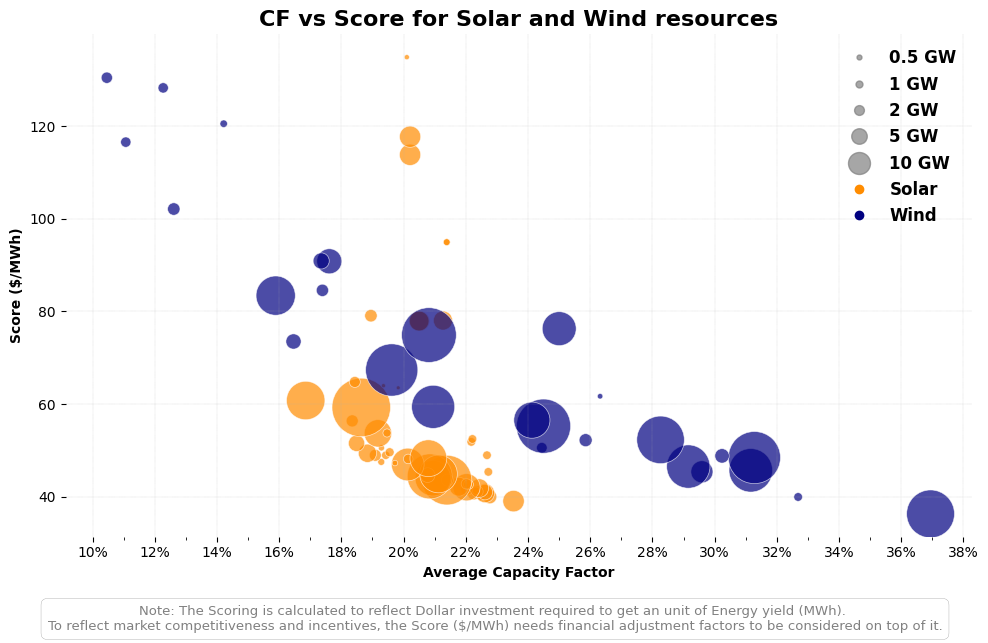

In [19]:
# Example of correct argument dictionary (if you want to use kwargs)
scatter_plot_args = {
    "solar_clusters": clusters_solar,
    "wind_clusters": clusters_wind,
    "bubbles_GW": [0.5, 1, 2, 5, 10], # bubble sizes in GW
    "bubbles_scale": 0.025, #100 times smaller than the original scale 
    "lcoe_threshold": 150, # LCOE threshold in $/MWh
    "font_family":font_family,
    "save_to_root": f"vis/{region_code}",
}

# Call the function using the argument dictionary
vis.plot_resources_scatter_metric_combined(**scatter_plot_args)

## CF checks

In [20]:
gwa_country_code=cfg.get('region_mapping').get(region_code).get('GWA_country_code')
utils.print_banner(f"GWA Country Code Selected: {gwa_country_code}")

******************************
GWA Country Code Selected: CAN
******************************


### Wind

In [21]:
# Get total bounds from boundary GeoDataFrame
minx, miny, maxx, maxy = boundary.total_bounds

# Create bounding_box_dict with correct keys for downstream use
bounding_box_dict = {
    "minx": float(minx),
    "miny": float(miny),
    "maxx": float(maxx),
    "maxy": float(maxy)
}


In [22]:
import rioxarray as rxr

raster_path=f'./data/downloaded_data/GWA/{gwa_country_code}_capacity-factor_IEC3.tif'
gwa_raster_data = (
        rxr.open_rasterio(raster_path)
        .rio.clip_box(**bounding_box_dict)
        .rename('CF_IEC3')
        .drop_vars(['band', 'spatial_ref'])
        .isel(band=1 if '*Class*' in 'CF_IEC3' else 0)  # 'IEC_Class_ExLoads' data is in band 1
    )


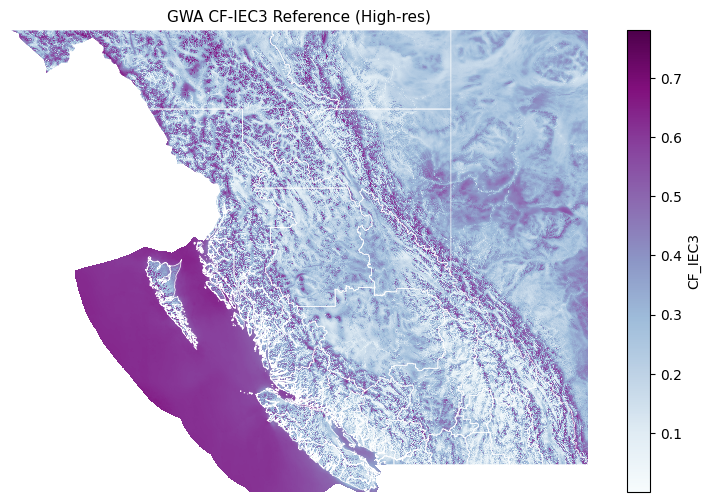

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
gwa_raster_data.plot(ax=ax, cmap='BuPu', add_colorbar=True)
boundary.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5)
ax.set_title('GWA CF-IEC3 Reference (High-res)', fontsize=11, fontfamily=font_family)
ax.axis('off')
plt.show()
plt.savefig(f"vis/{region_code}/GWA_CF_IEC3.png", dpi=300, bbox_inches='tight', transparent=False)

In [24]:
columns = ['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']
cells[columns].describe().style.format(precision=2).set_caption("Summary Statistics for GWA CF data and calibrated Wind CF_mean")

,CF_IEC2,CF_IEC3,wind_CF_mean
count,2948.00,2948.00,2948.00
mean,0.26,0.29,0.26
std,0.09,0.09,0.12
min,0.06,0.07,0.02
25%,0.20,0.22,0.17
50%,0.25,0.28,0.24
75%,0.32,0.35,0.33
max,0.61,0.63,0.71


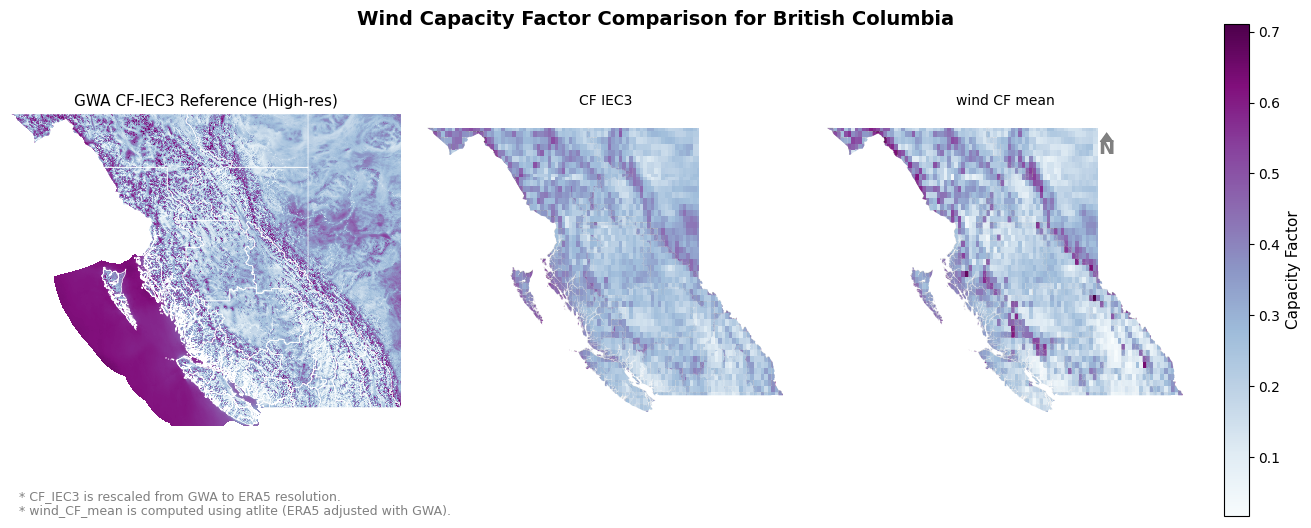

,CF_IEC3,wind_CF_mean
count,2948.00,2948.00
mean,0.29,0.26
std,0.09,0.12
min,0.07,0.02
25%,0.22,0.17
50%,0.28,0.24
75%,0.35,0.33
max,0.63,0.71


└> Wind CF comparison plot created and saved to: vis/British Columbia/Wind_CF_comparison.png


<Figure size 640x480 with 0 Axes>

In [25]:
vis.get_CF_wind_check_plot(cells, 
                       gwa_raster_data,
                       boundary,
                       region_name,
                       ['CF_IEC3', 'wind_CF_mean'],
                       figure_height=5,
                       font_family=font_family)

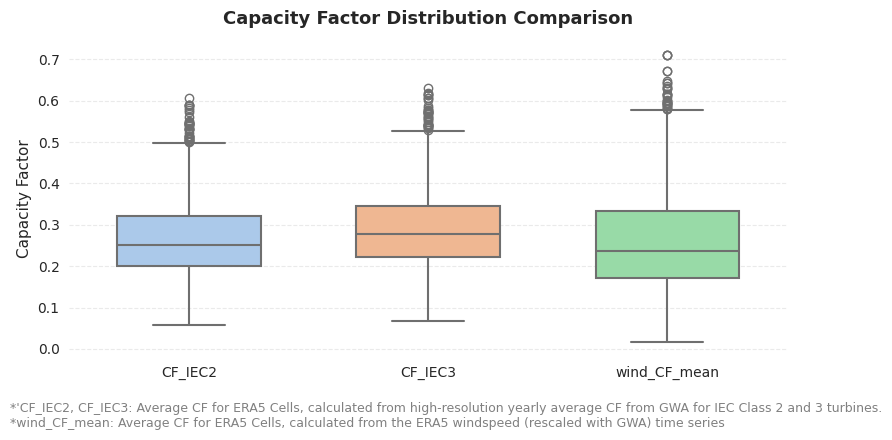

<Figure size 640x480 with 0 Axes>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import fill

# Set a clean and minimal style
sns.set_style("white")

# Initialize the figure
plt.figure(figsize=(8, 4))
plt.rcParams['font.family']=font_family
# Create the boxplot
ax = sns.boxplot(
    data=cells[['CF_IEC2', 'CF_IEC3', 'wind_CF_mean']],
    palette="pastel",
    linewidth=1.5,
    width=0.6
)

# Set title and labels
ax.set_title('Capacity Factor Distribution Comparison', fontsize=13, weight='semibold', pad=12)
ax.set_ylabel('Capacity Factor', fontsize=11)
ax.set_xlabel('')

# Tweak tick formatting
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Remove all spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.grid(False)

plt.figtext(
    0.01, -0.08,
    "*'CF_IEC2, CF_IEC3: Average CF for ERA5 Cells, calculated from high-resolution yearly average CF from GWA for IEC Class 2 and 3 turbines.\n"
    "*wind_CF_mean: Average CF for ERA5 Cells, calculated from the ERA5 windspeed (rescaled with GWA) time series ",
    ha='left', fontsize=9, style='normal', fontweight='normal', color='gray'
)

plt.tight_layout()
plt.show()
plt.savefig(f"vis/{region_code}/CF_distribution_comparison.png", dpi=300, bbox_inches='tight', transparent=False)

* Solar 

### CLusters

In [27]:
clusters_wind_f=clusters_wind[clusters_wind['potential_capacity']>0]
clusters_solar_f=clusters_solar[clusters_solar['potential_capacity']>0]

In [28]:
print(f'Total sites {len(clusters_wind_f)}')
total_capacity=clusters_wind_f.potential_capacity.sum()
print(f'Total Capacity {int(total_capacity/1E3)} GW')
sites=5
top_sites_capacity=clusters_wind_f.head(sites).potential_capacity.sum()
print(f'Top {sites} sites ({round(sites/len(clusters_wind_f)*100)}% site) capacity {int(top_sites_capacity/1E3)} GW ({round(top_sites_capacity/total_capacity*100)}% of total capacity)')

Total sites 56
Total Capacity 663 GW
Top 5 sites (9% site) capacity 136 GW (21% of total capacity)


In [29]:
print(f'Total sites {len(clusters_solar_f)}')
total_capacity=clusters_solar_f.potential_capacity.sum()
print(f'Total Capacity {int(total_capacity/1E3)} GW')
sites=5
top_sites_capacity=clusters_solar_f.head(sites).potential_capacity.sum()
print(f'Top {sites} sites ({round(sites/len(clusters_solar_f)*100)}% site) capacity {int(top_sites_capacity/1E3)} GW ({round(top_sites_capacity/total_capacity*100)}% of total capacity)')

Total sites 82
Total Capacity 517 GW
Top 5 sites (6% site) capacity 19 GW (4% of total capacity)


# Static Plots

In [37]:
aeroway=gpd.read_file(f'./data/downloaded_data/OSM/{region_code}_aeroway.geojson')

/localhome/mei3/miniconda3/envs/RES/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: Several features with id = 1374701 have been found. Altering it to be unique. This warning will not be emitted anymore for this layer
  return ogr_read(


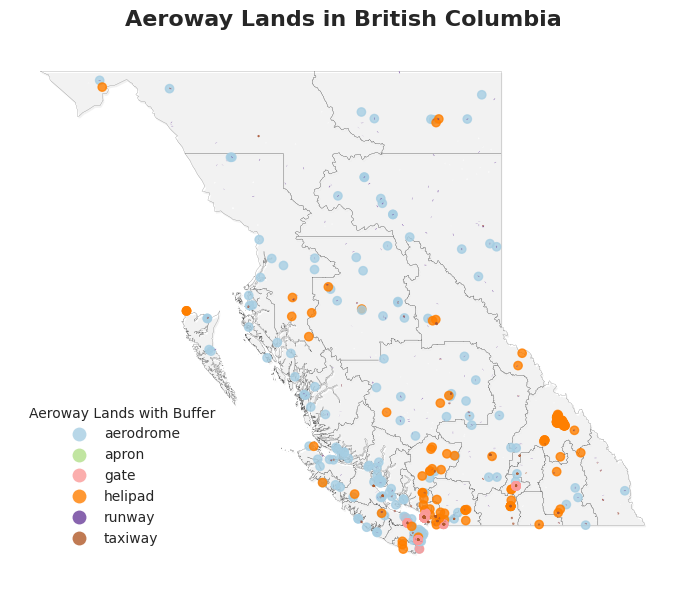

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=font_family
fig, ax = plt.subplots(figsize=(12, 6))
shadow_offset=0.05
# Plot boundary with subtle shadow effect
boundary.geometry = boundary.geometry.translate(xoff=shadow_offset, yoff=-shadow_offset)
boundary.plot(ax=ax, facecolor='grey', edgecolor='lightgray', linewidth=0.1, alpha=0.1)
boundary.geometry = boundary.geometry.translate(xoff=-shadow_offset, yoff=shadow_offset)
boundary.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=0.1, alpha=1)

# Plot aeroway data
aeroway.plot(
    column='aeroway',
    ax=ax,
    legend=True,
    legend_kwds={
        'title': "Aeroway Lands with Buffer",
        'loc': 'lower left',
        'bbox_to_anchor': (0.01, 0.04),
        'frameon': False
    },
    alpha=0.8,
    cmap='Paired'
)

# Clean up plot
ax.set_title(f"Aeroway Lands in {region_name}", fontsize=16, fontweight='bold', pad=15)
ax.axis('off')
plt.tight_layout()
plt.savefig(f'vis/{region_code}/misc/Aeroway_{region_name}.png', dpi=300)
plt.show()


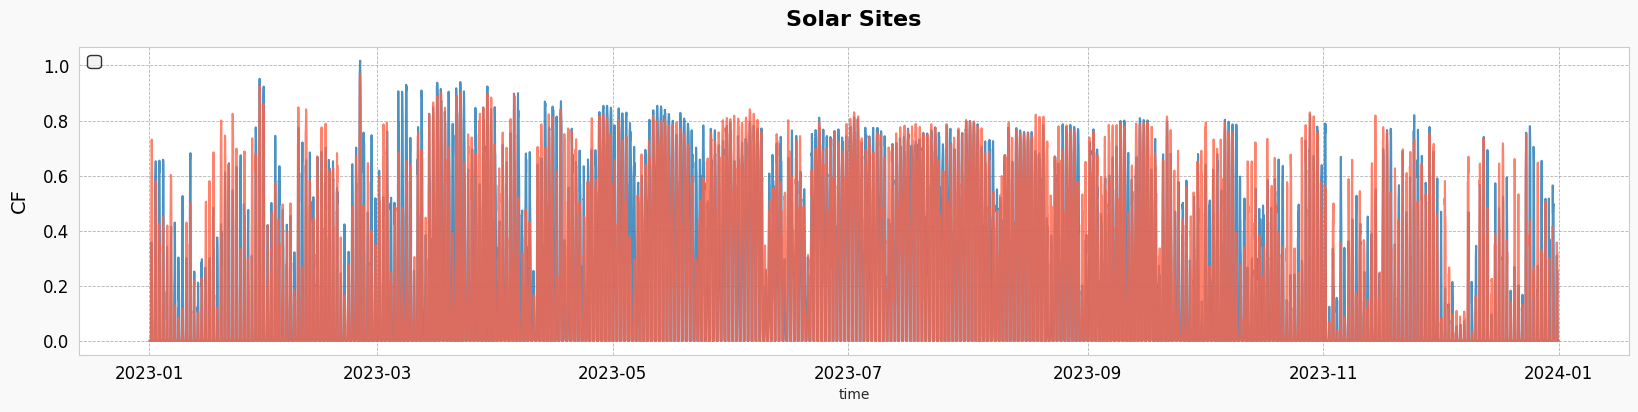

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")  

# Create figure
fig, ax = plt.subplots(figsize=(20, 4), facecolor="#f9f9f9")  # Light background
plt.rcParams['font.family']=font_family

# Define custom colors
colors = ['#1f77b4', '#ff6347']

# Plot using Seaborn
sns.lineplot(data=timeseries_clusters_solar, x=timeseries_clusters_solar.index, y=timeseries_clusters_solar.iloc[:, 0], ax=ax, color=colors[0], linewidth=1.5, alpha=0.8, )
sns.lineplot(data=timeseries_clusters_solar, x=timeseries_clusters_solar.index, y=timeseries_clusters_solar.iloc[:, 1], ax=ax, color=colors[1], linewidth=1.5, alpha=0.8,)

# Enhance aesthetics
ax.set_facecolor("#ffffff")  # Pure white plot area
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6, color="gray")

# Labels & title
ax.set_title("Solar Sites", fontsize=16, color="black", fontweight="bold", pad=15)
# ax.set_xlabel("Time", fontsize=14, color="black", labelpad=10)
ax.set_ylabel("CF", fontsize=14, color="black", labelpad=10)

# Customize ticks
ax.tick_params(axis='x', colors="black", labelsize=12)
ax.tick_params(axis='y', colors="black", labelsize=12)

# Add a legend
ax.legend(facecolor="#f0f0f0", edgecolor="black", fontsize=12, loc="upper left", frameon=True)

# Show plot
plt.show()


In [33]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set Seaborn style for better aesthetics
# sns.set_style("whitegrid")  

# # Create figure
# fig, ax = plt.subplots(figsize=(20, 4.5), facecolor="#f9f9f9")  # Light background

# # Define custom colors
# colors = ['#1f77b4', '#ff6347']

# # Plot using Seaborn
# sns.lineplot(data=timeseries_clusters_wind, x=timeseries_clusters_wind.index, y='Capital_1', ax=ax, color=colors[0], linewidth=1.5, alpha=0.8, label="Capital 1")
# sns.lineplot(data=timeseries_clusters_wind, x=timeseries_clusters_wind.index, y='PeaceRiver_1', ax=ax, color=colors[1], linewidth=1.5, alpha=0.8, label="Peace River 1")

# # Enhance aesthetics
# ax.set_facecolor("#ffffff")  # Pure white plot area
# ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.6, color="gray")

# # Labels & title
# ax.set_title("Wind Sites", fontsize=16, color="black", fontweight="bold", pad=15)
# # ax.set_xlabel("Time", fontsize=14, color="black", labelpad=10)
# ax.set_ylabel("CF", fontsize=14, color="black", labelpad=10)

# # Customize ticks
# ax.tick_params(axis='x', colors="black", labelsize=12)
# ax.tick_params(axis='y', colors="black", labelsize=12)

# # Add a legend
# ax.legend(facecolor="#f0f0f0", edgecolor="black", fontsize=12, loc="upper left", frameon=True)

# # Show plot
# plt.show()


# Static Data Visuals in Interactive Maps

In [34]:
"""
import hvplot.pandas
import holoviews as hv
from holoviews import opts
from bokeh.layouts import gridplot
from bokeh.io import show

# Initialize Holoviews extension
hv.extension('bokeh')


# Define a dictionary to map columns to specific colormaps
cmap_mapping = {
    'lcoe_wind': 'cool',
    'potential_capacity_wind': 'Blues',
    'lcoe_solar': 'autumn',
    'CF_IEC2': 'RdYlGn',
    'wind_CF_mean': 'RdYlGn',
    'windspeed_ERA5': 'winter',
    'nearest_station_distance_km': 'Oranges',
    'potential_capacity_wind': 'Blues',
    'potential_capacity_solar': 'Oranges',
}

# Define a function to create individual plots
def create_plot(column_name, cmap):
    return cells.hvplot(
        color=column_name,
        cmap=cmap,
        geo=True,
        tiles='CartoDark',  # Default base map
        frame_width=300,  # Adjust the size of the plots
        frame_height=300,  # Adjust the size of the plots
        data_aspect=.5,
        alpha=0.8,
        line_color='None',
        line_width=0.1,
        hover_line_color='red'
    ).opts(title=column_name,
            show_grid=True,
            show_legend=True,
            tools=['hover', 'pan', 'wheel_zoom','reset','box_select'],
            legend_position='top_right'
        )

# Create a list of plots for each column
plots = [create_plot(col, cmap) for col, cmap in cmap_mapping.items()]

# Create a grid layout for the plots
grid = hv.Layout(plots).cols(3)  # Adjust the number of columns as needed

# Show the layout
hv.save(grid, 'docs/grid_plots.html')  # Save the grid layout as an HTML file



# Render the layout as a Bokeh object
bokeh_layout = hv.render(grid, backend='bokeh')

# Show the layout
show(bokeh_layout)
"""

"\nimport hvplot.pandas\nimport holoviews as hv\nfrom holoviews import opts\nfrom bokeh.layouts import gridplot\nfrom bokeh.io import show\n\n# Initialize Holoviews extension\nhv.extension('bokeh')\n\n\n# Define a dictionary to map columns to specific colormaps\ncmap_mapping = {\n    'lcoe_wind': 'cool',\n    'potential_capacity_wind': 'Blues',\n    'lcoe_solar': 'autumn',\n    'CF_IEC2': 'RdYlGn',\n    'wind_CF_mean': 'RdYlGn',\n    'windspeed_ERA5': 'winter',\n    'nearest_station_distance_km': 'Oranges',\n    'potential_capacity_wind': 'Blues',\n    'potential_capacity_solar': 'Oranges',\n}\n\n# Define a function to create individual plots\ndef create_plot(column_name, cmap):\n    return cells.hvplot(\n        color=column_name,\n        cmap=cmap,\n        geo=True,\n        tiles='CartoDark',  # Default base map\n        frame_width=300,  # Adjust the size of the plots\n        frame_height=300,  # Adjust the size of the plots\n        data_aspect=.5,\n        alpha=0.8,\n        

# Timeseries Plots

In [35]:
# import pandas as pd
# import hvplot.pandas
# import panel as pn
# import random

# # Initialize Panel with the dark theme
# pn.extension(theme='default')

# # Load your DataFrames
# df_solar = timeseries_clusters_solar  # Your solar DataFrame
# df_wind = timeseries_clusters_wind    # Your wind DataFrame

# # Create a list of the column names for the dropdowns
# solar_options = df_solar.columns.tolist()
# wind_options = df_wind.columns.tolist()

# # Function to generate a random vibrant color
# def get_random_vibrant_color():
#     return "#{:02x}{:02x}{:02x}".format(random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))


# # Create a function to update the solar plot based on the selected time series
# def update_solar_plot(selected_series):
#     return df_solar[selected_series].hvplot.line(
#         title=f"Time Series - Solar: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=200,  # Height of the plot
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color()  # Random vibrant color for the solar plot
#     )

# # Create a function to update the wind plot based on the selected time series
# def update_wind_plot(selected_series):
#     return df_wind[selected_series].hvplot.line(
#         title=f"Time Series - Wind: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=200,  # Height of the plot
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color()  # Random vibrant color for the wind plot
#     )

# # Create dropdown widgets for selecting the time series
# solar_dropdown = pn.widgets.Select(name='Select Solar Time Series', options=solar_options)
# wind_dropdown = pn.widgets.Select(name='Select Wind Time Series', options=wind_options)

# # Create dynamic panels that update the plot based on the dropdown selections
# dynamic_solar_plot = pn.bind(update_solar_plot, selected_series=solar_dropdown)
# dynamic_wind_plot = pn.bind(update_wind_plot, selected_series=wind_dropdown)

# # Create a layout with the dropdowns and the plots in a two-row grid
# grid_layout = pn.Column(
#     solar_dropdown, dynamic_solar_plot,  # Solar plot in the first row
#     wind_dropdown, dynamic_wind_plot     # Wind plot in the second row
# )

# # Save the grid layout as an HTML file
# grid_layout.save('../docs/time_series_plots.html')

# # Display the panel in a notebook or in a web application
# grid_layout.show()

In [36]:
# import pandas as pd
# import hvplot.pandas
# import panel as pn
# import random

# # Initialize Panel with the dark theme
# pn.extension(theme='default')

# # Load your DataFrames
# df_solar = timeseries_clusters_solar  # Your solar DataFrame
# df_wind = timeseries_clusters_wind    # Your wind DataFrame
# clusters_solar = clusters_solar       # Your clusters_solar DataFrame

# # Create a list of the column names for the dropdowns
# solar_options = df_solar.columns.tolist()
# wind_options = df_wind.columns.tolist()

# # Function to generate a random vibrant color
# def get_random_vibrant_color():
#     return "#{:02x}{:02x}{:02x}".format(random.randint(150, 255), random.randint(150, 255), random.randint(150, 255))

# # Create a function to update the solar plot based on the selected time series
# def update_solar_plot(selected_series):
#     return df_solar[selected_series].hvplot.line(
#         title=f"Time Series - Solar: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=300,  # Increased height for better visibility
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color(),  # Random vibrant color for the solar plot
#         line_width=2,  # Make line thicker for better visibility
#         fontsize={'title': 16, 'xlabel': 14, 'ylabel': 14, 'legend': 12},  # Adjust font sizes
#     )

# # Create a function to update the wind plot based on the selected time series
# def update_wind_plot(selected_series):
#     return df_wind[selected_series].hvplot.line(
#         title=f"Time Series - Wind: {selected_series}",
#         xlabel="DateTime",
#         ylabel="Value",
#         legend='top_left',
#         width=1000,  # Width of the plot
#         height=300,  # Increased height for better visibility
#         tools=['hover'],  # Enable hover tool
#         line_color=get_random_vibrant_color(),  # Random vibrant color for the wind plot
#         line_width=2,  # Make line thicker for better visibility
#         fontsize={'title': 16, 'xlabel': 14, 'ylabel': 14, 'legend': 12},  # Adjust font sizes
#     )

# # Create dropdown widgets for selecting the time series
# solar_dropdown = pn.widgets.Select(name='Select Solar Time Series', options=solar_options, width=300)
# wind_dropdown = pn.widgets.Select(name='Select Wind Time Series', options=wind_options, width=300)


# # Create dynamic panels that update the plot based on the dropdown selections
# dynamic_solar_plot = pn.bind(update_solar_plot, selected_series=solar_dropdown)
# dynamic_wind_plot = pn.bind(update_wind_plot, selected_series=wind_dropdown)

# # Function to get relevant row data from clusters_solar
# def get_cluster_info(selected_series):
#     # Use the selected series name to find the relevant row in clusters_solar
#     selected_row = clusters_solar.loc[selected_series]
#     return selected_row

# # Create a function to update the table based on the selected time series
# def update_cluster_table(selected_series):
#     cluster_info = get_cluster_info(selected_series)
    
#     # Drop the geometry column if it exists
#     if 'geometry' in cluster_info.index:
#         cluster_info = cluster_info.drop('geometry')
    
#     # Return the DataFrame widget without the geometry column
#     return pn.widgets.DataFrame(cluster_info.to_frame().T, width=800, height=200)


# # Create dynamic panels for the table
# dynamic_cluster_table = pn.bind(update_cluster_table, selected_series=solar_dropdown)

# # Adjust the overall layout for better alignment and spacing
# grid_layout = pn.Column(
#     pn.Row(solar_dropdown, dynamic_solar_plot, align="center"),  # Center align solar dropdown and plot
#     pn.Row(dynamic_cluster_table),  # Show the table below the solar plot
#     pn.Row(wind_dropdown, dynamic_wind_plot, align="center"),    # Center align wind dropdown and plot
#     sizing_mode='stretch_width',  # Make layout responsive to different screen sizes
#     width=1100,  # Set a consistent width for the layout
#     height=900   # Adjust height to give more space for plots
# )

# # Save the grid layout as an HTML file
# grid_layout.save('../docs/time_series_plots_with_table.html')

# # Display the panel in a notebook or in a web application
# grid_layout.show()
